# Project Assignment #2

### Introduction

For my project I would like to look into NFT'S. More specifically, I would like to look into which NFT's are the most popular, largest in value, and owned by the most people. An NFT, short for non-fungible token is a unique and non-interchangeable unit of data that is stored on a digital ledger otherwise known as a blockchain. NFT's can consist of virtually anything such as ideas, physical properties, intellectual property and many other things. The first NFT was created back in 2014, however in 2021 there was a massive boom in the amount of people who started purchasing NFT's and the amount of content creators that began to create their own NFT's, due to the rise in popularty of cryptocurrency. For many buyers now NFT's are a form of investment while also an entryway into the growing digital world.

As of now I have two data sources that I plan on using which I found on kaggle. One has a dataset of 7 million transactions of non-fungible tokens (NFTs) on the Ethereum blockchain. The dataset covers April to late September 2021, spans 9,000 NFT projects, and records each transaction’s sender, receiver, value, timestamp, and location in the blockchain. The second dataset which I will be analyzing in this notebook contains 250 NFT collections and their all time statistics such as sales, transactions, ownership and buyers.

### Introduction to the Data

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('nft_sales.csv')

In [80]:
df

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"
...,...,...,...,...,...
245,Evolution,"$2,536,468",746,"4,961","2,061"
246,LegionPunks,"$2,535,490","1,702","3,794","2,410"
247,BabyApes,"$2,521,714","1,671","3,405","2,785"
248,Train of the Century,"$2,504,080","3,139","39,460","3,160"


In [81]:
df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,244
unique,250,250,246,249,235
top,Axie Infinity,"$3,328,148,500","3,246","4,523",1
freq,1,1,2,2,5


In [82]:
# WHy are all the columns objects?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       244 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [83]:
# Cleaning the dataset so that cells are properly read
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna()
df

/tmp/ipykernel_50/4239910403.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')


,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [90]:
# Converting string numericals to integers
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')

/tmp/ipykernel_50/2833295058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales in USD'] = df['Sales in USD'].astype('int64')
/tmp/ipykernel_50/2833295058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buyers'] = df['Buyers'].astype('int64')
/tmp/ipykernel_50/2833295058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [91]:
df.dtypes

Collections     object
Sales in USD     int64
Buyers           int64
Transactions     int64
Owners           int32
dtype: object

In [95]:
df.describe()

,Sales in USD,Buyers,Transactions,Owners
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
mean,5.967748e+07,1.259175e+04,1.379179e+05,2.884790e+04
std,2.573985e+08,7.738002e+04,1.021682e+06,2.384134e+05
min,2.498805e+06,3.100000e+01,4.700000e+01,1.000000e+00
25%,4.627684e+06,2.346750e+03,5.928500e+03,2.533750e+03
50%,1.139971e+07,3.977000e+03,9.527500e+03,3.536000e+03
75%,3.394315e+07,5.583500e+03,1.443625e+04,4.883500e+03
max,3.328148e+09,1.079811e+06,1.179070e+07,2.656431e+06


<AxesSubplot:xlabel='Collections'>

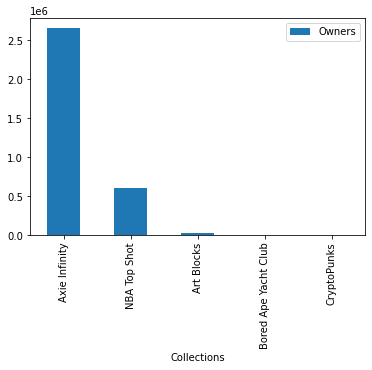

In [102]:
# Seeing which are the 5 NFT collections with the most owners. In descending order
df.head().sort_values(by='Owners',ascending=False).plot(kind='bar',x='Collections',y='Owners')

<AxesSubplot:ylabel='Collections'>

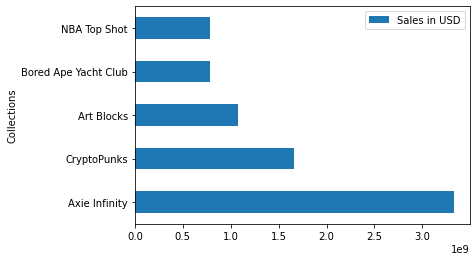

In [105]:
# Plotting NFT collections with the most sales 
df.head().sort_values(by='Sales in USD',ascending=False).plot(kind='barh',x='Collections',y='Sales in USD')